<center><h1 style="font-size:35px; font-family: 'Times New Roman'; letter-spacing: 0.1em;"> Extracting Text from Images </h1></center>

1. Read the data
2. Extract text from images:
    - pytesseract
    - easyocr
    - keras_ocr
3. Run on a few examples and compare the results

In [7]:
import pandas as pd
import numpy as np
 # Import the glob function to retrieve file paths
from glob import glob
from tqdm.notebook import tqdm

import matplotlib.pyplot as plt
from PIL import Image

plt.style.use('ggplot')

In [2]:
pip install fastparquet

Note: you may need to restart the kernel to use updated packages.


In [8]:
# Read in data
# Read annotation data from the 'annot.parquet' 
annot = pd.read_parquet('data/annot.parquet')

# Read image data from the 'img.parquet'
imgs = pd.read_parquet('data/img.parquet')

# Use the `glob` function to get a list of file paths of all images in the 'data/train_images/' directory and store it in the 'img_fns' variable
img_fns = glob('data/train_images/*')

# Plot Example Images

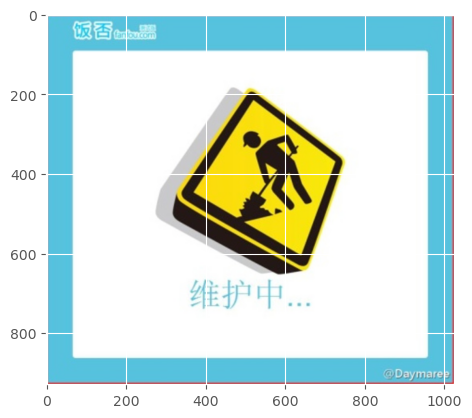

In [9]:
plt.imshow(plt.imread(img_fns[0]))

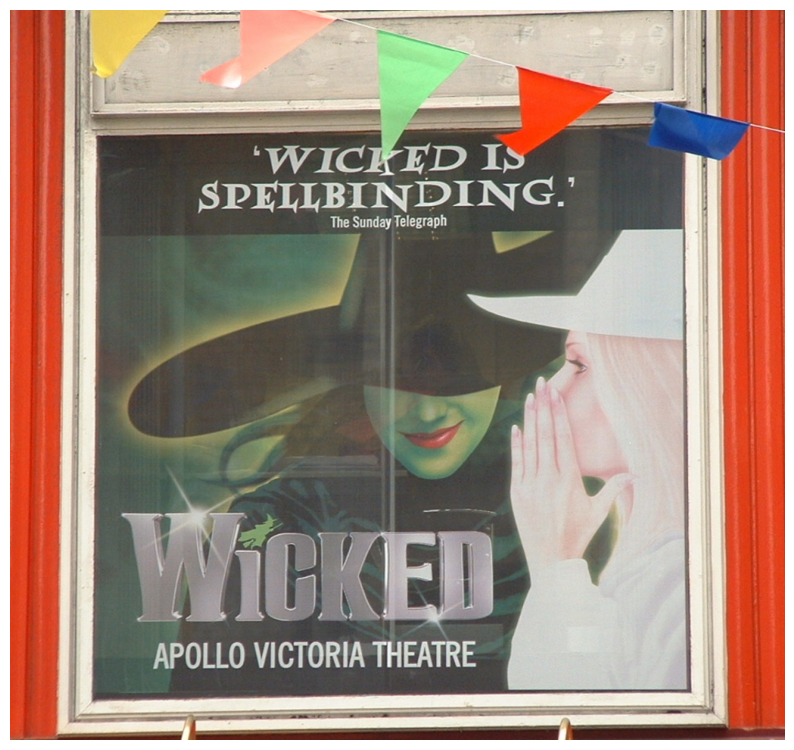

In [10]:
#Create a new figure and axes object for plotting
fig, ax = plt.subplots(figsize=(10, 10))
ax.imshow(plt.imread(img_fns[200]))
ax.axis('off')
plt.show()

In [11]:
# Assuming you have already loaded the image file names in the 'img_fns' list and have the 'annot' DataFrame with annotation data.

# Step 1: Extract the image ID from the file path of the first image in the 'img_fns' list.
# The file path is split using the '/' delimiter to get the last part of the path, which represents the image file name.
# The image file name is then split using the '.' delimiter to remove the file extension and keep only the image ID.
image_id = img_fns[0].split('/')[-1].split('.')[0]

# Step 2: Query the 'annot' DataFrame to filter rows with the specified 'image_id'.
# The `query()` method allows you to filter rows in the DataFrame based on a condition specified as a string.
# In this case, it is looking for rows where the 'image_id' column matches the value of the 'image_id' variable.
# The result of this query will be a subset of the 'annot' DataFrame containing annotations related to the specific image ID.
annotations_related_to_image = annot.query('image_id == @image_id')


## Display for first 25 images

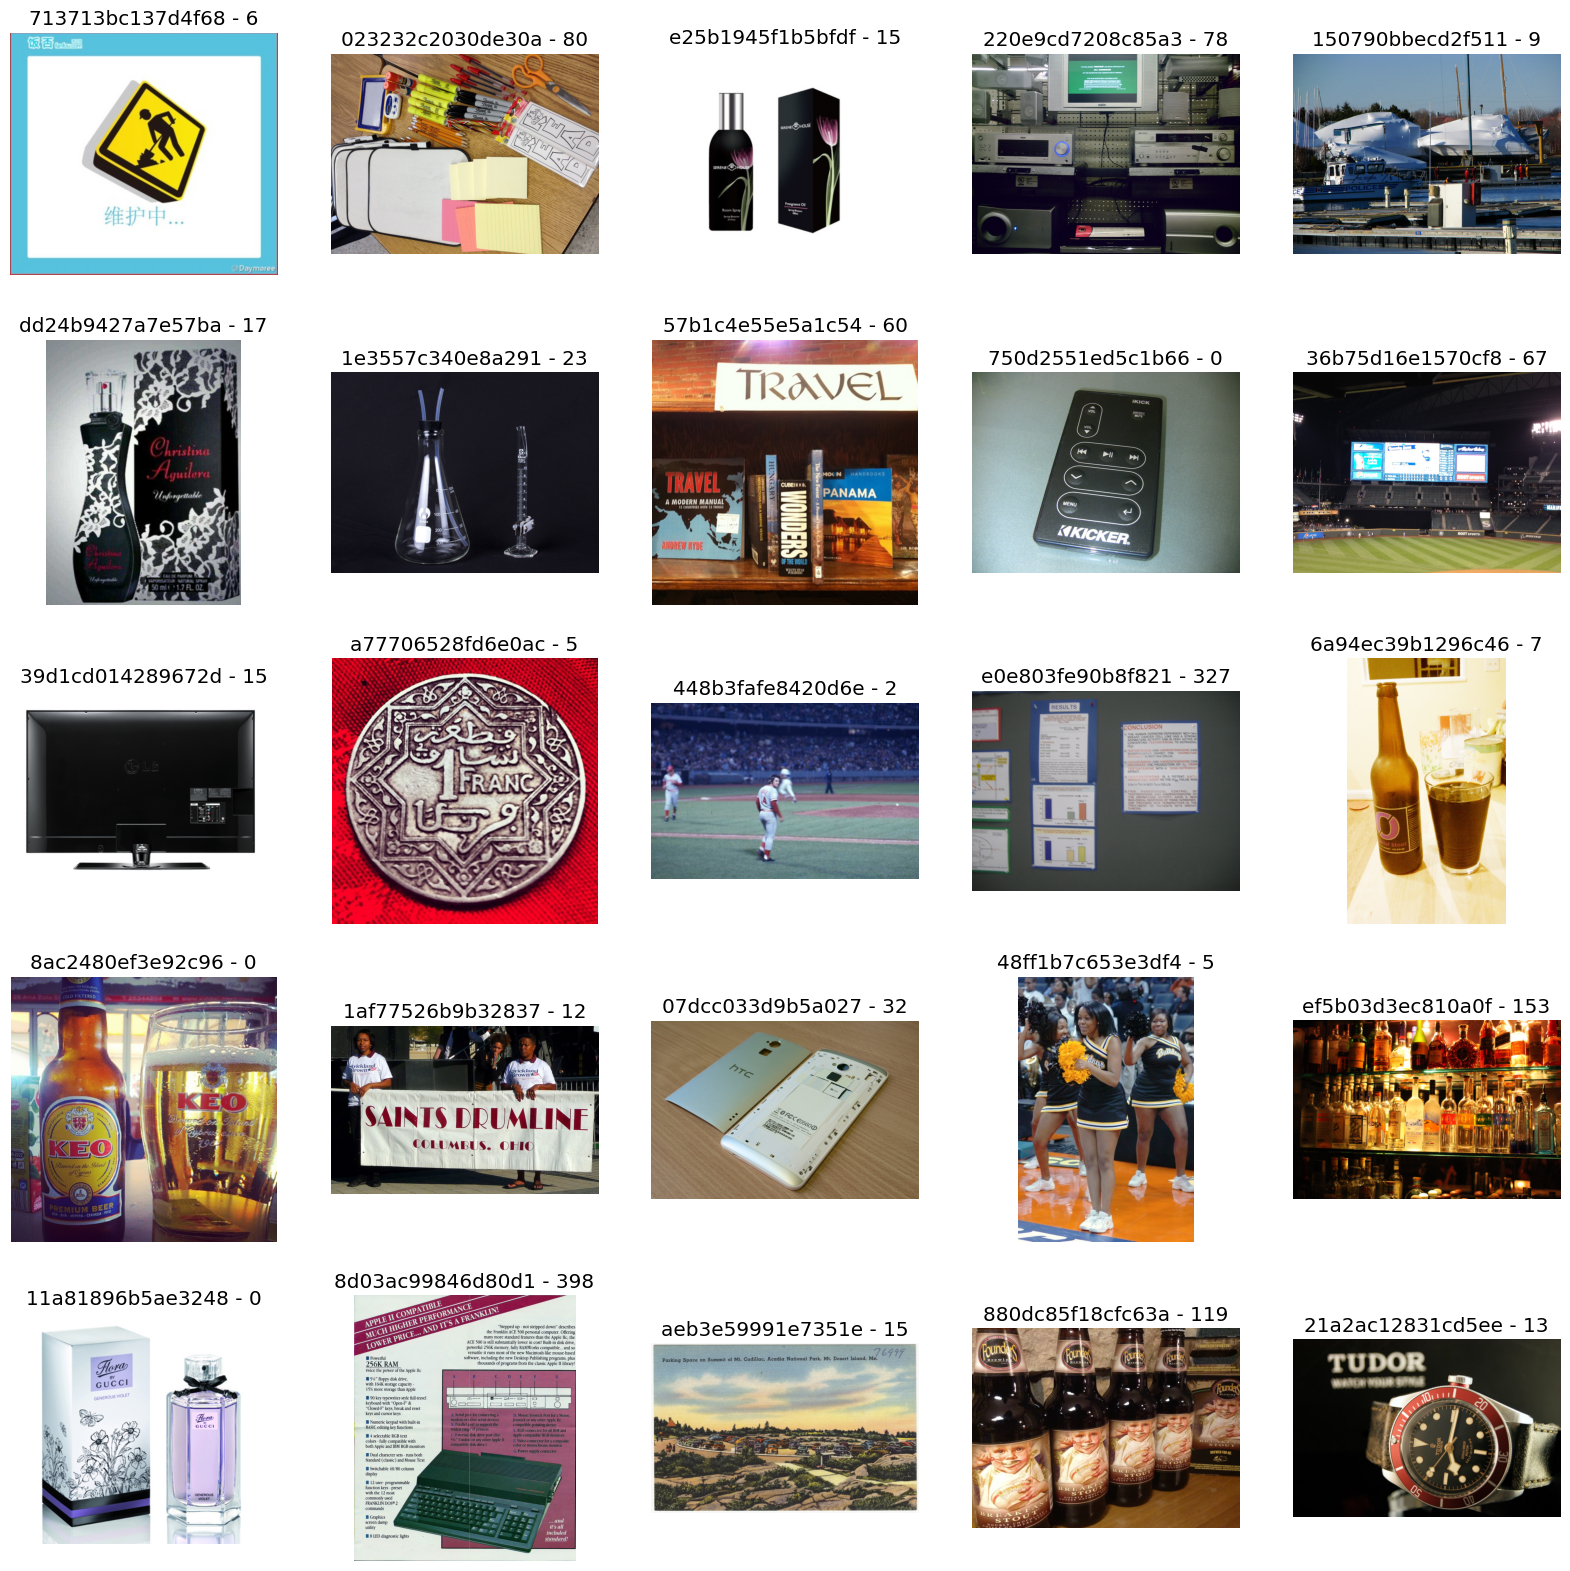

In [12]:

# Assuming `img_fns` is a list of image file names and `annot` is a DataFrame containing annotations related to the images.

# Create a 5x5 grid of subplots and set the overall figure size
fig, axs = plt.subplots(5, 5, figsize=(20, 20))

# Flatten the 5x5 grid of subplots into a 1-dimensional array of axes
axs = axs.flatten()

# Loop through the first 25 images in `img_fns` and display them on the corresponding subplots
for i in range(25):
    # Load the image from the specified file path using `plt.imread()`
    image = plt.imread(img_fns[i])
    
    # Display the loaded image on the current subplot
    axs[i].imshow(image)

    # Hide the axis ticks and labels to make the images cleaner
    axs[i].axis('off')
    
    # Extract the image ID from the file path and count the number of annotations related to that image
    image_id = img_fns[i].split('/')[-1].rstrip('.jpg')
    n_annot = len(annot.query('image_id == @image_id'))
    
    # Set the title of the subplot with the image ID and the number of annotations
    axs[i].set_title(f'{image_id} - {n_annot}')

# Show the plot (display all the images with their titles)
plt.show()

# Method 1: pytesseract

In [18]:
pip install pytesseract

Note: you may need to restart the kernel to use updated packages.


In [13]:
import pytesseract
# Step 1: Initialize the pytesseract library, which allows us to extract text from images.
# Step 2: Extract text from an image and print it.

# Example call
print(pytesseract.image_to_string(img_fns[11], lang='eng'))

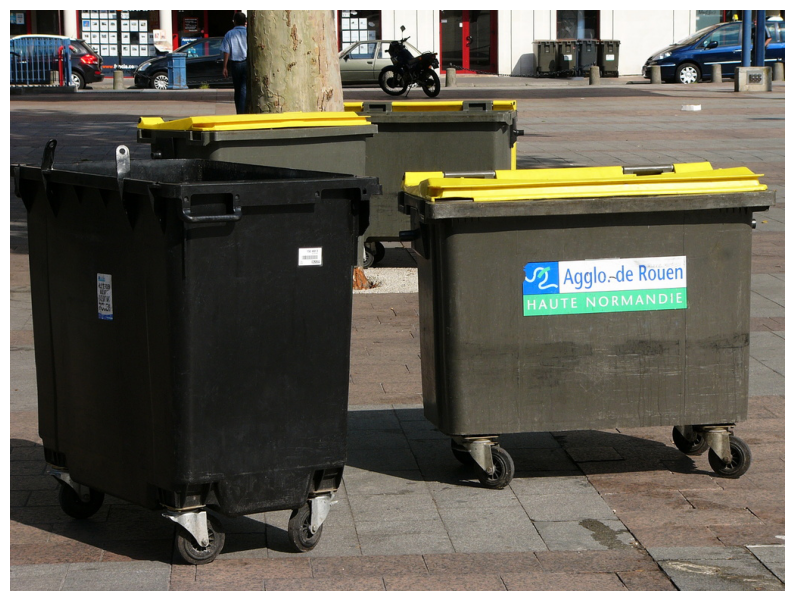

In [14]:
# Assuming img_fns is a list of image filenames containing the images you want to display.
fig, ax = plt.subplots(figsize=(10, 10))

# Read and load the image from the specified file path.
image_array = plt.imread(img_fns[50])

# Display the image on the axis
ax.imshow(image_array)

# Turn off the axis (remove axis ticks and labels) to make the image cleaner.
ax.axis('off')

# Show the plot
plt.show()


# Method 2: easyocr

In [12]:
pip install easyocr

Note: you may need to restart the kernel to use updated packages.


In [15]:
import easyocr

#Initialize an OCR reader using easyocr.
reader = easyocr.Reader(['en'], gpu = True)

Neither CUDA nor MPS are available - defaulting to CPU. Note: This module is much faster with a GPU.


In [16]:
#Perform OCR on the image.
#The 'reader.readtext()' method will process the image and return the OCR results as a list of text detections.
results = reader.readtext(img_fns[50])

In [17]:
#Convert OCR results to a pandas DataFrame.
#Create a DataFrame from the OCR results.

#The 'results' list will be converted into a tabular format with three columns:
# 'bbox': Bounding box coordinates of the detected text in the format (x_min, y_min, x_max, y_max).
# 'text': The extracted text from the detected region.
# 'conf': Confidence score indicating the OCR's confidence level in the detected text.

df=pd.DataFrame(results, columns=['bbox','text','conf'])

In [18]:
df.head()

bbox              text  \
0  [[726, 333], [895, 333], [895, 376], [726, 376]]   Agglo-de Rouen]   
1  [[676, 367], [893, 367], [893, 403], [676, 403]]  [HAUTE NORMANDIE   

       conf  
0  0.569549  
1  0.402775

# Method 3: keras_ocr

In [22]:
!pip install keras-ocr -q

In [19]:
import keras_ocr

# Step 1: Import the 'keras_ocr' library

# Step 2: Create an OCR pipeline using the 'Pipeline' class provided by 'keras_ocr'
# This will initialize the OCR pipeline and load pre-trained models for text detection and recognition.
# The pipeline will be stored in the 'pipeline' variable.
pipeline = keras_ocr.pipeline.Pipeline()

2023-07-26 00:54:40.565575: I tensorflow/core/util/port.cc:110] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2023-07-26 00:54:40.915062: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 AVX512F AVX512_VNNI FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-07-26 00:54:41.910950: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT


Looking for /home/mohaned/.keras-ocr/craft_mlt_25k.h5
Looking for /home/mohaned/.keras-ocr/crnn_kurapan.h5


In [20]:
# Assuming you have already created the OCR pipeline using the `keras_ocr.pipeline.Pipeline()` function, as mentioned in the previous code.

# Step 1: Assuming 'img_fns' is a list of image file names, and you want to recognize text in the image located at index 50.

# Step 2: Call the `recognize()` method of the OCR pipeline and pass a list containing the file path of the image you want to recognize.
# The `recognize()` method will perform text recognition on the specified image and return the results.
results = pipeline.recognize([img_fns[50]])

1/1 [==============================] - 1s 958ms/step


In [21]:

# Assuming you have already executed the OCR pipeline and stored the results in the 'results' variable.

# Step 1: Access the first element of the 'results' list, which contains the OCR results for the first (and only) image processed.
# The 'results' list contains dictionaries, where each dictionary represents the OCR results for an individual image.
# Since you processed only one image, you can access its results with 'results[0]'.
ocr_results = results[0]

# Step 2: Convert the OCR results to a pandas DataFrame.
# The OCR results are represented as a list of dictionaries, where each dictionary contains 'text' and 'bbox' keys.
# 'text' represents the recognized text, and 'bbox' represents the bounding box coordinates of the detected text region.
# By converting this list of dictionaries to a DataFrame, each dictionary element will become a row in the DataFrame, with 'text' and 'bbox' as columns.
df_ocr_results = pd.DataFrame(ocr_results, columns=['text', 'bbox'])

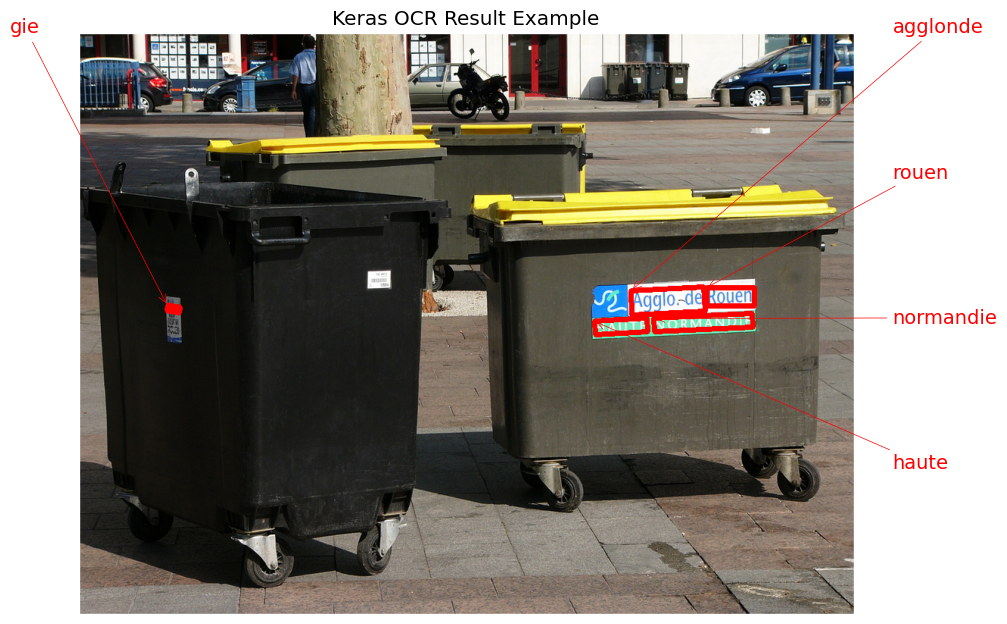

In [22]:
import matplotlib.pyplot as plt  # Import the matplotlib library for plotting
import keras_ocr  # Import the keras_ocr library for OCR

# Assuming you have already created the OCR pipeline and stored the results in the 'results' variable.

# Step 1: Create a new figure and axes object for plotting
fig, ax = plt.subplots(figsize=(10, 10))

# Step 2: Use the `drawAnnotations()` function to draw bounding boxes around the detected text regions and display the recognized text on the image.
# The function takes three arguments:
#   - The image data, which can be loaded using `plt.imread(img_fns[50])`.
#   - The OCR results, which are stored in 'results[0]' for the first image processed.
#   - The 'ax' parameter represents the axes object on which the annotations will be drawn.
keras_ocr.tools.drawAnnotations(plt.imread(img_fns[50]), results[0], ax=ax)

# Step 3: Set the title of the plot to describe the content of the image
ax.set_title('Keras OCR Result Example')

# Step 4: Show the plot (display the image with the annotations)
plt.show()